In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
# load and prapare the fashionminst dataset
import tensorflow as tf

# Load and prepare the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
print(len(train_images))

60000


In [ ]:
print(len(train_labels))

60000


In [ ]:
print(train_images[0].shape)

(28, 28)


In [ ]:
print(train_images[2])

[[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48
   88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221
  142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157
   68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61
   93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76
   97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80
   96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81
   95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85
   97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97  81  85  84  85  8

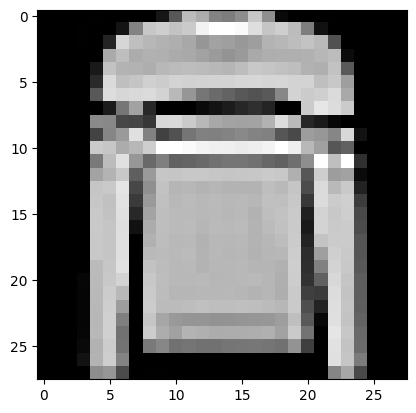

In [ ]:
# display an image from a dataset
import matplotlib.pyplot as plt

plt.imshow(train_images[5], cmap='gray')
plt.show()



In [ ]:
print(train_labels[0])

9


In [ ]:
# normalize pixel value to between 0 and 1

train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
# reshape images to specify thats its a single channel(grayscale)

train_iamges = train_images.reshape([train_images.shape[0],28, 28, 1])
test_images = test_images.reshape([test_images.shape[0], 28, 28, 1])

In [ ]:
train_images.shape

(60000, 28, 28)

**CONVOLUTIONAL NEURAL NETWORKS (CNN:)**

In [ ]:
# build the convolutional base

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))


In [ ]:
from tensorflow.keras import models, layers

# Add dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))


In [ ]:
# compile and tain the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


**MODEL TRAINING**

In [ ]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=[test_images, test_labels])

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4898 - accuracy: 0.8207 - val_loss: 0.3590 - val_accuracy: 0.8709
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3170 - accuracy: 0.8835 - val_loss: 0.3251 - val_accuracy: 0.8826
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2694 - accuracy: 0.9003 - val_loss: 0.3042 - val_accuracy: 0.8901
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2403 - accuracy: 0.9118 - val_loss: 0.2730 - val_accuracy: 0.9013
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2173 - accuracy: 0.9193 - val_loss: 0.2786 - val_accuracy: 0.9024


**MODEL EVALUATION**


In [ ]:
# evaluate the model

test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)


313/313 - 1s - loss: 0.2786 - accuracy: 0.9024 - 1s/epoch - 3ms/step

Test accuracy 0.902400016784668


<ipython-input-48-fd2abd5e20c7>:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(['Tarin'], ['Test'], loc='upper left')


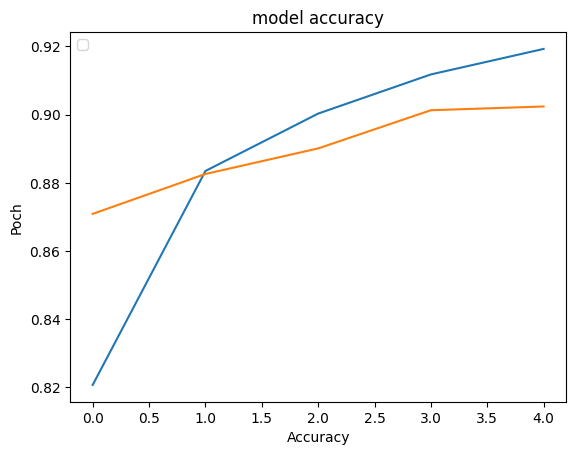

In [ ]:
# plot training and validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Poch')
plt.legend(['Tarin'], ['Test'], loc='upper left')
plt.show()

In [ ]:
model.save('trained_fashion_mnist_model.h2')